In [1]:
%load_ext autoreload
%load_ext autotime

time: 302 µs (started: 2023-09-22 10:17:43 -07:00)


In [2]:
import os
import sys
import warnings
wisio_dir = os.path.abspath("../../")
# sys.path.append(wisio_dir)
warnings.filterwarnings('ignore')
sys.path

['/g/g91/izzet/projects/wisio/notebooks/evals',
 '/g/g91/izzet/projects/wisio',
 '/g/g91/izzet/projects/wisio/notebooks/evals',
 '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python39.zip',
 '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9',
 '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/lib-dynload',
 '',
 '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages']

time: 8.45 ms (started: 2023-09-22 10:17:50 -07:00)


In [3]:
import csv
import dask
import dask.dataframe as dd
import json
import numpy as np
import pandas as pd

time: 1.05 s (started: 2023-09-22 10:18:04 -07:00)


In [4]:
pd.__version__

'1.5.3'

time: 1.81 ms (started: 2023-09-22 10:18:05 -07:00)


In [5]:
dask.__version__

'2022.12.1'

time: 5.97 ms (started: 2023-09-22 10:18:05 -07:00)


In [6]:
%autoreload 2

from wisio.recorder import RecorderAnalyzer

# log_dir = "/p/vast1/iopp/recorder_app_logs/cm1/nodes-32/workflow-4/_parquet"
# log_dir = "/p/vast1/iopp/recorder_app_logs/montage_pegasus/nodes-32/_parquet"
log_dir = "/p/vast1/iopp/recorder_app_logs/cm1/nodes-32/workflow-4/_parquet"
# log_dir = "/p/vast1/iopp/recorder_app_logs/hacc/nodes-32/workflow-0/_parquet"
# log_dir = "/p/vast1/iopp/recorder_app_logs/montage/nodes-32/_parquet"
# log_dir = "/p/gpfs1/iopp/recorder_app_logs/genome_pegasus/nodes-32/_parquet"
# log_dir = "/p/gpfs1/iopp/recorder_app_logs/lbann-jag/nodes-32/_parquet"

def init_analyzer():
    return RecorderAnalyzer(
        cluster_manager_args=dict(
#             force_local=True,
            cluster_settings=dict(
                cores=8,
                dashboard_port=3676,
                local_directory="/var/tmp/wisio-recorder-mpv",
                log_file="%J.log",
                worker_queue="pdebug"
            )
        ),
        working_dir='.recorder',
        debug=True
    )

# recorder_analyzer = init_analyzer()

time: 892 ms (started: 2023-09-22 10:18:07 -07:00)


In [7]:
analyzer = init_analyzer()

time: 649 ms (started: 2023-09-22 10:18:10 -07:00)


In [8]:
client = analyzer.cluster_manager.clients[0]
client

Connection method: Cluster object,Cluster type: dask_jobqueue.LSFCluster
Dashboard: http://192.168.66.200:3676/status,
Dashboard: http://192.168.66.200:3676/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://192.168.66.200:45141,Workers: 0
Dashboard: http://192.168.66.200:3676/status,Total threads: 0
Started: Just now,Total memory: 0 B


time: 31.2 ms (started: 2023-09-22 10:18:11 -07:00)


In [10]:
client.run(lambda: sys.path)

{'tcp://192.168.64.3:34781': ['/var/tmp/wisio-recorder-mpv/cluster-0/dask-worker-space/worker-irwyohmx',
  '/g/g91/izzet/projects/wisio/notebooks/evals',
  '/g/g91/izzet/projects/wisio',
  '/g/g91/izzet/projects/wisio/notebooks/evals',
  '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python39.zip',
  '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9',
  '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/lib-dynload',
  '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages'],
 'tcp://192.168.64.3:35009': ['/var/tmp/wisio-recorder-mpv/cluster-0/dask-worker-space/worker-qlzxk3y_',
  '/g/g91/izzet/projects/wisio/notebooks/evals',
  '/g/g91/izzet/projects/wisio',
  '/g/g91/izzet/projects/wisio/notebooks/evals',
  '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python39.zip',
  '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9',
  '/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/

time: 20.8 ms (started: 2023-09-22 10:18:26 -07:00)


In [12]:
log_dirs = {
    'cm1': '/p/vast1/iopp/recorder_app_logs/cm1/nodes-32/workflow-4/_parquet',
#     'hacc': '/p/vast1/iopp/recorder_app_logs/hacc/nodes-32/workflow-0/_parquet',
#     'lbann-jag': '/p/gpfs1/iopp/recorder_app_logs/lbann-jag/nodes-32/_parquet',
#     'montage': '/p/vast1/iopp/recorder_app_logs/montage/nodes-32/_parquet',
#     'montagep': '/p/vast1/iopp/recorder_app_logs/montage_pegasus/nodes-32/_parquet',
    # 'mummi-wemul': '/p/gpfs1/iopp/recorder_app_logs/mummi-wemul/nodes-32-ppn-32/_parquet',
}
log_dirs

{'cm1': '/p/vast1/iopp/recorder_app_logs/cm1/nodes-32/workflow-4/_parquet'}

time: 2.25 ms (started: 2023-09-22 10:19:52 -07:00)


In [13]:
from time import sleep

cutoffs = [1, 0.99, 0.95, 0.9, 0.75, 0.5, 0.25, 0.125, 0.01, 0]
metrics = ['duration']
results = {}
# analyzer = None
for app, log_dir in log_dirs.items():
    results[app] = {}
#     if analyzer is not None:
#         analyzer.cluster_manager.shutdown()
#     analyzer = init_analyzer()
#     print('client', analyzer.cluster_manager.clients[0].dashboard_link)
#     sleep(20)
    for metric in metrics:
        results[app][metric] = {}
        for cutoff in cutoffs:
#             print(app, metric, cutoff)
            result = analyzer.analyze_parquet(
                log_dir=log_dir,
                checkpoint=False,
                cutoff=cutoff,
                metrics=metrics,
            )
            results[app][metric][cutoff] = {}
            for view_key in result.views[metric].keys():
                view_name = '_'.join(view_key) if isinstance(view_key, tuple) else view_key
                results[app][metric][cutoff][view_name] = len(result.views[metric][view_key])
#                 if cutoff > 0:
#                     mpvdata_file = f"results/mpvdata/cutoff-{app}-{metric}-{cutoff}-{view_name}"
#                     result.views[metric][view_key].to_parquet(mpvdata_file, compute=True)
#                 print(app, metric, cutoff, view_name, results[app][metric][cutoff][view_name])
        with open(f"results/mpv-cutoff-{app}-{metric}.csv", 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=',')
            csvwriter.writerow([*['perspective'], *[str(c) for c in cutoffs]])
            view_names = results[app][metric][0].keys()
            for view_name in view_names:
                csvrow = [view_name]
                for cutoff in cutoffs:
                    csvrow.append(str(results[app][metric][cutoff][view_name]))
                csvwriter.writerow(csvrow)

ValueError: Metadata inference failed in `set_time_ranges`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
CancelledError('ndarray-18b618deb7943c35a893f3cb44a07bbc')

Traceback:
---------
  File "/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages/dask/dataframe/utils.py", line 195, in raise_on_meta_error
    yield
  File "/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages/dask/dataframe/core.py", line 6560, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "/g/g91/izzet/projects/wisio/wisio/_recorder/analysis.py", line 356, in set_time_ranges
    time_ranges = time_ranges.result() if isinstance(
  File "/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages/distributed/client.py", line 281, in result
    result = self.client.sync(self._result, callback_timeout=timeout, raiseit=False)
  File "/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages/distributed/utils.py", line 339, in sync
    return sync(
  File "/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages/distributed/utils.py", line 406, in sync
    raise exc.with_traceback(tb)
  File "/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages/distributed/utils.py", line 379, in f
    result = yield future
  File "/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages/tornado/gen.py", line 767, in run
    value = future.result()
  File "/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages/distributed/client.py", line 306, in _result
    result = await self.client._gather([self])
  File "/usr/workspace/iopp/anaconda-lassen/envs/wisio_lassen/lib/python3.9/site-packages/distributed/client.py", line 2158, in _gather
    raise exc


time: 25.6 s (started: 2023-09-22 10:19:54 -07:00)


In [ ]:
%autoreload 2

res = recorder_analyzer.analyze_parquet(log_dir=log_dir, checkpoint=False, cutoff=0.01)

In [ ]:
main_view, views, bottlenecks = res

time: 604 µs (started: 2023-06-27 12:41:45 -07:00)


In [ ]:
print('main_view', len(main_view))
for view_key in views.keys():
    print(view_key, len(views[view_key]))

main_view 62789
('trange',) 61468
('file_name',) 21193
('proc_name',) 16620
('trange', 'file_name') 21169
('trange', 'proc_name') 16572
('file_name', 'trange') 21168
('file_name', 'proc_name') 5377
('proc_name', 'trange') 16578
('proc_name', 'file_name') 5385
('trange', 'file_name', 'proc_name') 5361
('trange', 'proc_name', 'file_name') 5369
('file_name', 'trange', 'proc_name') 5360
('file_name', 'proc_name', 'trange') 5360
('proc_name', 'trange', 'file_name') 5369
('proc_name', 'file_name', 'trange') 5368
('app_name',) 62043
('node_name',) 62789
('rank',) 16782
('file_dir',) 62786
('file_regex',) 49743
time: 42 s (started: 2023-06-27 12:06:06 -07:00)


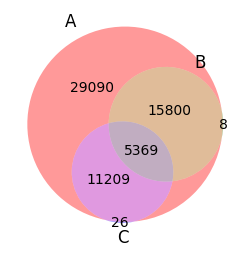

time: 1.04 s (started: 2023-06-27 12:11:43 -07:00)


In [21]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# names = ['main_view']
names = []
sets = []
# sets.append(set(main_view['id'].compute()))
for view_key in [('trange',), ('file_name',), ('proc_name',)]:
    names.append('_'.join(view_key) if isinstance(view_key, tuple) else view_key)
    sets.append(set(views[view_key]['id'].compute()))

plt.figure(figsize=(5,3))
venn3(sets)
plt.show()

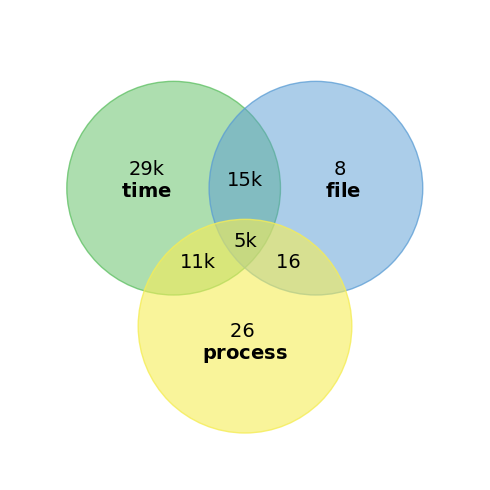

time: 1.18 s (started: 2023-06-27 12:33:49 -07:00)


In [63]:
import venn

# names2 = ['main_view']
names2 = []
sets2 = []
# sets2.append(set(main_view['id'].compute()))
for view_key in [('trange',), ('file_name',), ('proc_name',)]:
    names2.append('_'.join(view_key) if isinstance(view_key, tuple) else view_key)
    sets2.append(set(views[view_key]['id'].compute()))

labels = venn.get_labels(sets2)
fixed_labels = {}
for label in labels:
    label_val = int(labels[label])
    if label_val > 1000:
        fixed_labels[label] = f"{label_val // 1000}k"
    else:
        fixed_labels[label] = labels[label]
fixed_labels['001'] = f"{fixed_labels['001']}\n" + r"$\bf{process}$"
fixed_labels['010'] = f"{fixed_labels['010']}\n" + r"$\bf{file}$"
fixed_labels['100'] = f"{fixed_labels['100']}\n" + r"$\bf{time}$"
# plt.figure(figsize=(5,3))
fig, ax = venn.venn3(fixed_labels, names=names2, figsize=(5,5))
ax.get_legend().remove()
# fig.tight_layout()
fig.tight_layout()


In [39]:
labels

{'001': '26 ',
 '010': '8 ',
 '011': '16 ',
 '100': '29090 ',
 '101': '11209 ',
 '110': '15800 ',
 '111': '5369 '}

time: 4.38 ms (started: 2023-06-27 12:21:05 -07:00)


In [20]:
# coding: utf-8
from itertools import chain
try:
    # since python 3.10
    from collections.abc import Iterable
except ImportError:
    from collections import Iterable
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import math

default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

def draw_ellipse(fig, ax, x, y, w, h, a, fillcolor):
    e = patches.Ellipse(
        xy=(x, y),
        width=w,
        height=h,
        angle=a,
        color=fillcolor)
    ax.add_patch(e)

def draw_triangle(fig, ax, x1, y1, x2, y2, x3, y3, fillcolor):
    xy = [
        (x1, y1),
        (x2, y2),
        (x3, y3),
    ]
    polygon = patches.Polygon(
        xy=xy,
        closed=True,
        color=fillcolor)
    ax.add_patch(polygon)

def draw_text(fig, ax, x, y, text, color=[0, 0, 0, 1], fontsize=14, ha="center", va="center"):
    ax.text(
        x, y, text,
        horizontalalignment=ha,
        verticalalignment=va,
        fontsize=fontsize,
        color="black")

def draw_annotate(fig, ax, x, y, textx, texty, text, color=[0, 0, 0, 1], arrowcolor=[0, 0, 0, 0.3]):
    plt.annotate(
        text,
        xy=(x, y),
        xytext=(textx, texty),
        arrowprops=dict(color=arrowcolor, shrink=0, width=0.5, headwidth=8),
        fontsize=14,
        color=color,
        xycoords="data",
        textcoords="data",
        horizontalalignment='center',
        verticalalignment='center'
    )

def get_labels(data, fill=["number"]):
    """
    get a dict of labels for groups in data

    @type data: list[Iterable]
    @rtype: dict[str, str]

    input
      data: data to get label for
      fill: ["number"|"logic"|"percent"]

    return
      labels: a dict of labels for different sets

    example:
    In [12]: get_labels([range(10), range(5,15), range(3,8)], fill=["number"])
    Out[12]:
    {'001': '0',
     '010': '5',
     '011': '0',
     '100': '3',
     '101': '2',
     '110': '2',
     '111': '3'}
    """

    N = len(data)

    sets_data = [set(data[i]) for i in range(N)]  # sets for separate groups
    s_all = set(chain(*data))                     # union of all sets

    # bin(3) --> '0b11', so bin(3).split('0b')[-1] will remove "0b"
    set_collections = {}
    for n in range(1, 2**N):
        key = bin(n).split('0b')[-1].zfill(N)
        value = s_all
        sets_for_intersection = [sets_data[i] for i in range(N) if  key[i] == '1']
        sets_for_difference = [sets_data[i] for i in range(N) if  key[i] == '0']
        for s in sets_for_intersection:
            value = value & s
        for s in sets_for_difference:
            value = value - s
        set_collections[key] = value

    labels = {k: "" for k in set_collections}
    if "logic" in fill:
        for k in set_collections:
            labels[k] = k + ": "
    if "number" in fill:
        for k in set_collections:
            labels[k] += str(len(set_collections[k]))
    if "percent" in fill:
        data_size = len(s_all)
        for k in set_collections:
            labels[k] += "(%.1f%%)" % (100.0 * len(set_collections[k]) / data_size)

    return labels

def venn2(labels, names=['A', 'B'], **options):
    """
    plots a 2-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('01', '10', '11'),
              hence a valid set could look like: {'01': 'text 1', '10': 'text 2', '11': 'text 3'}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(2)])
    figsize = options.get('figsize', (9, 7))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=0.7)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.375, 0.3, 0.5, 0.5, 0.0, colors[0])
    draw_ellipse(fig, ax, 0.625, 0.3, 0.5, 0.5, 0.0, colors[1])
    draw_text(fig, ax, 0.74, 0.30, labels.get('01', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.26, 0.30, labels.get('10', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.30, labels.get('11', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.20, 0.56, names[0], colors[0], fontsize=fontsize, ha="right", va="bottom")
    draw_text(fig, ax, 0.80, 0.56, names[1], colors[1], fontsize=fontsize, ha="left", va="bottom")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax

def venn3(labels, names=['A', 'B', 'C'], **options):
    """
    plots a 3-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('001', '010', '100', ...),
              hence a valid set could look like: {'001': 'text 1', '010': 'text 2', '100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(3)])
    figsize = options.get('figsize', (9, 9))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.333, 0.633, 0.6, 0.6, 0.0, colors[0]) 
    draw_ellipse(fig, ax, 0.666, 0.633, 0.6, 0.6, 0.0, colors[1])
    draw_ellipse(fig, ax, 0.500, 0.310, 0.6, 0.6, 0.0, colors[2])
    draw_text(fig, ax, 0.50, 0.27, labels.get('001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.73, 0.65, labels.get('010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.61, 0.4, labels.get('011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.27, 0.65, labels.get('100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.4, labels.get('101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.65, labels.get('110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.5, labels.get('111', ''), fontsize=fontsize)

#     {
#  '011': '16',

#  '101': '11209',

#  '111': '5369'}

    # legend
    # draw_text(fig, ax, 0.15, 0.87, names[0], colors[0], fontsize=fontsize, ha="right", va="bottom")
    # draw_text(fig, ax, 0.85, 0.87, names[1], colors[1], fontsize=fontsize, ha="left", va="bottom")
    # draw_text(fig, ax, 0.50, 0.02, names[2], colors[2], fontsize=fontsize, va="top")
    # leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    # leg.get_frame().set_alpha(0.5)

    return fig, ax

def venn4(labels, names=['A', 'B', 'C', 'D'], **options):
    """
    plots a 4-set Venn diagram

    @type labels: dict[str, str]
    @type names: list[str]
    @rtype: (Figure, AxesSubplot)

    input
      labels: a label dict where keys are identified via binary codes ('0001', '0010', '0100', ...),
              hence a valid set could look like: {'0001': 'text 1', '0010': 'text 2', '0100': 'text 3', ...}.
              unmentioned codes are considered as ''.
      names:  group names
      more:   colors, figsize, dpi, fontsize

    return
      pyplot Figure and AxesSubplot object
    """
    colors = options.get('colors', [default_colors[i] for i in range(4)])
    figsize = options.get('figsize', (12, 12))
    dpi = options.get('dpi', 96)
    fontsize = options.get('fontsize', 14)

    fig = plt.figure(0, figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_axis_off()
    ax.set_ylim(bottom=0.0, top=1.0)
    ax.set_xlim(left=0.0, right=1.0)

    # body
    draw_ellipse(fig, ax, 0.350, 0.400, 0.72, 0.45, 140.0, colors[0])
    draw_ellipse(fig, ax, 0.450, 0.500, 0.72, 0.45, 140.0, colors[1])
    draw_ellipse(fig, ax, 0.544, 0.500, 0.72, 0.45, 40.0, colors[2])
    draw_ellipse(fig, ax, 0.644, 0.400, 0.72, 0.45, 40.0, colors[3])
    draw_text(fig, ax, 0.85, 0.42, labels.get('0001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.68, 0.72, labels.get('0010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.77, 0.59, labels.get('0011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.32, 0.72, labels.get('0100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.71, 0.30, labels.get('0101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.66, labels.get('0110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.65, 0.50, labels.get('0111', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.14, 0.42, labels.get('1000', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.17, labels.get('1001', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.29, 0.30, labels.get('1010', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.39, 0.24, labels.get('1011', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.23, 0.59, labels.get('1100', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.61, 0.24, labels.get('1101', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.35, 0.50, labels.get('1110', ''), fontsize=fontsize)
    draw_text(fig, ax, 0.50, 0.38, labels.get('1111', ''), fontsize=fontsize)

    # legend
    draw_text(fig, ax, 0.13, 0.18, names[0], colors[0], fontsize=fontsize, ha="right")
    draw_text(fig, ax, 0.18, 0.83, names[1], colors[1], fontsize=fontsize, ha="right", va="bottom")
    draw_text(fig, ax, 0.82, 0.83, names[2], colors[2], fontsize=fontsize, ha="left", va="bottom")
    draw_text(fig, ax, 0.87, 0.18, names[3], colors[3], fontsize=fontsize, ha="left", va="top")
    leg = ax.legend(names, loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True)
    leg.get_frame().set_alpha(0.5)

    return fig, ax


time: 11.6 ms (started: 2023-06-27 12:47:17 -07:00)


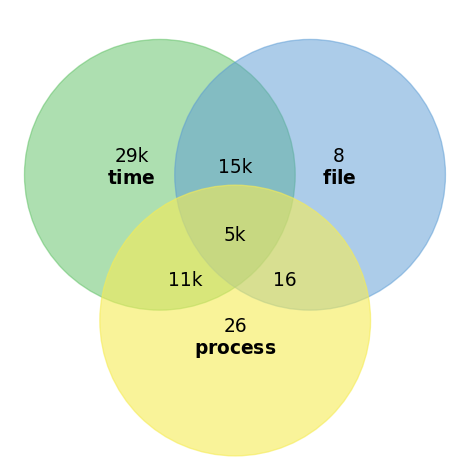

time: 1.02 s (started: 2023-06-27 12:48:11 -07:00)


In [23]:


# names2 = ['main_view']
names2 = []
sets2 = []
# sets2.append(set(main_view['id'].compute()))
for view_key in [('trange',), ('file_name',), ('proc_name',)]:
    names2.append('_'.join(view_key) if isinstance(view_key, tuple) else view_key)
    sets2.append(set(views[view_key]['id'].compute()))

labels = get_labels(sets2)
fixed_labels = {}
for label in labels:
    label_val = int(labels[label])
    if label_val > 1000:
        fixed_labels[label] = f"{label_val // 1000}k"
    else:
        fixed_labels[label] = labels[label]
fixed_labels['001'] = f"{fixed_labels['001']}\n" + r"$\bf{process}$"
fixed_labels['010'] = f"{fixed_labels['010']}\n" + r"$\bf{file}$"
fixed_labels['100'] = f"{fixed_labels['100']}\n" + r"$\bf{time}$"
# plt.figure(figsize=(5,3))
fig, ax = venn3(fixed_labels, names=names2, figsize=(5,5), dpi=96)
# ax.get_legend().remove()
# fig.tight_layout()
fig.tight_layout()


- DPI has to be 300
- Create Venn diagram for 6 apps
- Create PDFs (using PDF crop)

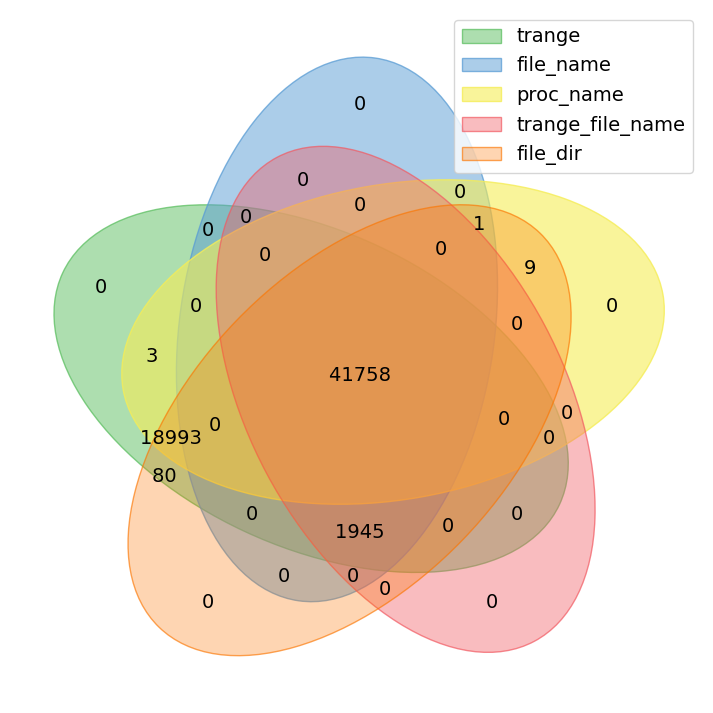

time: 3.21 s (started: 2023-06-27 11:08:41 -07:00)


In [10]:
import venn

# names2 = ['main_view']
names2 = []
sets2 = []
# sets2.append(set(main_view['id'].compute()))
for view_key in [('trange',), ('file_name',), ('proc_name',), ('trange', 'file_name'), ('file_dir',)]:
    names2.append('_'.join(view_key) if isinstance(view_key, tuple) else view_key)
    sets2.append(set(views[view_key]['id'].compute()))

labels = venn.get_labels(sets2)
fig, ax = venn.venn5(labels, names=names2)
fig.show()